# <center> Small Data Science Project </center>
## <center> Disease Prediction </center>

![alt_text](https://asquero.s3.us-east-2.amazonaws.com/project-images/5d0b91e9-0508-4681-bf0e-358414226cf2-header%20image.jpg)

#### <center> *Mustafa Kollu - 21627485* </center>
#### <center> *Sadık Can Acar - 21626843* </center>
#### <center> *Group 21* </center>

__Abstract__

There are some diseases that are difficult to diagnose by physicians. For example, the disease may be rare and the responsible physician may have no experience with this disease. Or there may be other diseases with similar symptoms and the physician may not be sure of the diagnosis. Whatever the cause, such cases typically result in unnecessary and expensive tests, eg blood work, x-ray, MRI, etc. In addition to wasting valuable resources, putting patients in distress is also a problem. Therefore, it is of great importance to diagnose a disease by making the best use of resources and without compromising healthcare quality.
In this project, we will use the data set obtained from the data of patients in the past. There are 4 types of diseases in this data set. We use the data set to see the factors that cause these diseases and to train our model. The model we have created is used to predict the disease in the most accurate way. We dynamically select the features to be used in the model with Feature Importance. We used and compared various classification methods (KNN, SVM, Decision Tree Classifier, Random Forest Classifier, Gaussian Naive Bayes, Logistic Regression) in the project. The model with the highest score is the Random Forest classification algorithm. That's why we will use the Random Forest classifier in our web application. We used predict.proba to identify the 3 most likely diseases when user symptoms entered the system.

## Table of Content
[1.Problem](#problem)   
[2.Data Understanding](#data_understanding)   
[3.Data Preparation](#data_preparation)   
[4.Modeling and Evaluation](#modeling)   
[5.Conclusion](#conclusion)   
[6.References](#references)

## 1. Problem <a class="anchor" id="problem"></a>

Diseases that are difficult to detect by physicians cause many problems. In addition to wasting precious resources, getting patients in trouble is also a problem. For this reason, it is of great importance to diagnose a disease by using resources in the best way and without compromising the quality of health care. As a solution to this problem, we will create a machine learning model to predict possible diseases for a particular patient. We will also develop a Web application to highlight our model and for any physician to use our model to diagnose their patients' ailments. With the contribution of the doctor, we will create a list of possible diseases with their probabilities. The idea is for the physician to start the diagnostic process by first thinking about the most likely disease.

**The questions that are need to be answer to solve the problem:**

    1. What are the important factors in disease diagnosis?
    2. Using machine learning, can we predict today's illness at the highest rate based on data from past patients?

Our problem has been mentioned above. Using machine learning approaches, we will predict the patient's illness at the highest rate and publish it with a Web application that physicians can use.

### _Import Library_

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Understanding <a class="anchor" id="data_understanding"></a>
In the section of understanding the data, we examined the row and column information, data types and statistical information of our data. Before preparing the data, we will learn about the data set.

In [2]:
data = pd.read_csv('sdsp_patients.csv')

We imported the data set provided by our instructor.

In [3]:
data.head()

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
0,Disease_1,Male,28.0,130,96.0,2.0,No,Yes,Yes,No,...,No,No,No,0,No,No,No,No,No,No
1,Disease_1,Male,18.0,95,46.0,3.0,Yes,No,No,No,...,No,Yes,No,0,No,No,No,No,No,No
2,Disease_1,Male,44.0,152,150.0,1.0,No,Yes,No,Yes,...,Yes,No,No,0,No,No,No,No,No,No
3,Disease_1,Male,19.0,112,66.0,18.0,No,No,No,Yes,...,No,Yes,No,0,No,No,No,No,No,No
4,Disease_1,Male,17.5,105.5,54.0,3.0,No,No,Yes,Yes,...,No,No,No,0,No,No,No,No,Yes,No


In [4]:
data.tail(5)

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
395,Disease_1,Female,36.0,142,144.0,24.0,No,No,No,Yes,...,Yes,No,No,8,Yes,No,No,No,No,No
396,Disease_1,Male,60.0,172,165.0,120.0,No,No,Yes,No,...,No,No,No,9,Yes,No,No,No,No,No
397,Disease_1,Female,41.0,147,156.0,60.0,No,Yes,No,No,...,No,No,No,9,Yes,Yes,Yes,No,No,No
398,Disease_1,Male,37.0,138,144.0,120.0,No,Yes,No,No,...,No,No,No,9,Yes,No,No,No,No,No
399,Disease_1,Male,30.0,130,108.0,6.0,Yes,No,No,No,...,No,Yes,No,9,Yes,No,Yes,No,No,No


Above we see the first 5 and the last 5 rows of our data. The columns are made up of the features of each patient. In the rows, there are the names of diseases that patients have according to their features.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    object 
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    object 
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    object 
 7   Feature_7   400 non-null    object 
 8   Feature_8   400 non-null    object 
 9   Feature_9   400 non-null    object 
 10  Feature_10  400 non-null    object 
 11  Feature_11  400 non-null    object 
 12  Feature_12  400 non-null    object 
 13  Feature_13  400 non-null    object 
 14  Feature_14  400 non-null    object 
 15  Feature_15  400 non-null    object 
 16  Feature_16  400 non-null    object 
 17  Feature_17  400 non-null    object 
 18  Feature_18  400 non-null    object 
 19  Feature_19  400 non-null    o

We have obtained information about column information, type information and occupancy information of our data. We have seen that our data set consists of 51 columns and 400 rows. In addition, we saw that 47 of the features are object and 4 of them are numerical values.

In [6]:
data.isnull().sum()

Disease         0
Feature_1       0
Feature_2       0
Feature_3       0
Feature_4       0
Feature_5       0
Feature_6       0
Feature_7       0
Feature_8       0
Feature_9       0
Feature_10      0
Feature_11      0
Feature_12      0
Feature_13      0
Feature_14      0
Feature_15      0
Feature_16      0
Feature_17      0
Feature_18      0
Feature_19      0
Feature_20      0
Feature_21      0
Feature_22      0
Feature_23      0
Feature_24      0
Feature_25      0
Feature_26      0
Feature_27      0
Feature_28      1
Feature_29      0
Feature_30      0
Feature_31      0
Feature_32     16
Feature_33     12
Feature_34      0
Feature_35     43
Feature_36    259
Feature_37      0
Feature_38      0
Feature_39      0
Feature_40      0
Feature_41      0
Feature_42      0
Feature_43      0
Feature_44      0
Feature_45      0
Feature_46      0
Feature_47      0
Feature_48      0
Feature_49      0
Feature_50      0
dtype: int64

We found that five columns have missing data. We thought that Feature_35 and Feature_36 were missing from these columns at an unfillable level.

In [7]:
data.describe(include="all")

,Disease,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_41,Feature_42,Feature_43,Feature_44,Feature_45,Feature_46,Feature_47,Feature_48,Feature_49,Feature_50
count,400,400,400.000000,400,400.000000,400.000000,400,400,400,400,...,400,400,400,400.000000,400,400,400,400,400,400
unique,4,2,NaN,98,NaN,NaN,2,2,2,2,...,2,2,2,NaN,2,2,3,3,3,3
top,Disease_1,Female,NaN,110,NaN,NaN,No,No,No,No,...,No,No,No,NaN,No,No,No,No,No,No
freq,244,203,NaN,18,NaN,NaN,258,226,340,342,...,241,365,284,NaN,366,382,320,344,336,285
mean,NaN,NaN,29.410125,NaN,108.104000,23.038050,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.457500,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,14.350309,NaN,49.526425,24.742478,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.547314,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,10.000000,NaN,12.000000,0.060000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,18.000000,NaN,64.500000,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,25.525000,NaN,108.000000,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,38.000000,NaN,144.000000,36.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data["Feature_50"].value_counts()

No     285
Yes     91
        24
Name: Feature_50, dtype: int64

Looking at the data descriptions, we found that Feature_50, Feature_49, Feature_48 and Feature_47 should have two unique value types (Yes, No), but there are three. When we looked at the Feature_50 values, we saw that there are empty values.

## 3. Data Preparation <a class="anchor" id="data_preparation"></a>

### _Checking Missing Values_

In [9]:
data.replace(" ",np.nan,inplace=True)

During the Data Understanding phase, we saw that some of our columns had empty values. And we changed these values to nan.

In [10]:
data.isnull().sum() / data.shape[0] * 100

Disease        0.00
Feature_1      0.00
Feature_2      0.00
Feature_3      0.50
Feature_4      0.00
Feature_5      0.00
Feature_6      0.00
Feature_7      0.00
Feature_8      0.00
Feature_9      0.00
Feature_10     0.00
Feature_11     0.00
Feature_12     0.00
Feature_13     0.00
Feature_14     0.00
Feature_15     0.00
Feature_16     0.00
Feature_17     0.00
Feature_18     0.00
Feature_19     0.00
Feature_20     0.00
Feature_21     0.00
Feature_22     0.00
Feature_23     0.00
Feature_24     0.00
Feature_25     0.00
Feature_26     0.00
Feature_27     0.00
Feature_28     0.25
Feature_29     0.00
Feature_30     0.00
Feature_31     0.00
Feature_32     4.00
Feature_33     3.00
Feature_34     0.00
Feature_35    10.75
Feature_36    64.75
Feature_37     0.00
Feature_38     0.00
Feature_39     0.00
Feature_40     0.00
Feature_41     0.00
Feature_42     0.00
Feature_43     0.00
Feature_44     0.00
Feature_45     0.00
Feature_46     0.00
Feature_47     5.00
Feature_48     5.00
Feature_49     5.00


Above, we determined the ratio of missing data in a column to the total data in that column. We decided to remove Feature_35 and Feature_36 from our dataset, which we think these rates are high. In the columns where we think the rates are too low, we will replace the missing values with the most used value.

### _Checking Duplicate Rows_

In [11]:
duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 51)


We checked for duplicate rows in our data set and found no duplicate rows.

### _Data Cleaning and Filling Empty Values_

In [12]:
data = data.drop(columns = ['Feature_35', 'Feature_36'])

After deleting the columns with a high rate of lost value, we replaced the empty values in the columns that can be filled with the highest frequency values of those columns.

In [13]:
def plot_value_counts(column_name):
  sns.set(font_scale=1.4)
  data[column_name].value_counts().plot(kind='bar', figsize=(12, 6), rot=0)
  plt.xlabel(column_name, labelpad=14)
  plt.ylabel("Count", labelpad=14)

We wrote the above function to determine the number of values in the columns with empty values.

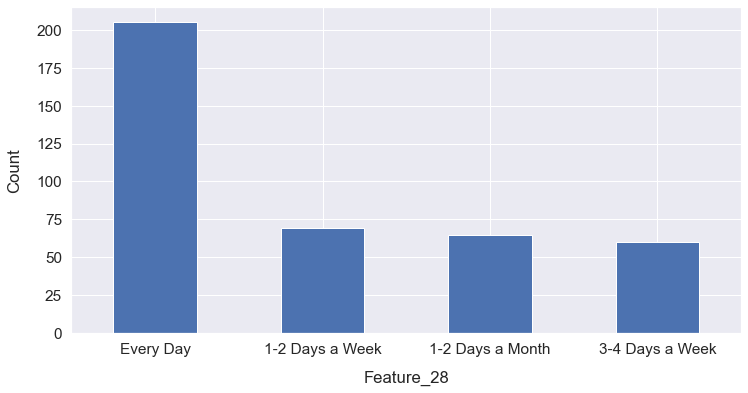

In [14]:
plot_value_counts('Feature_28')

In [15]:
data['Feature_28'].fillna(value='Every Day',inplace=True)

We determined that the most found value in "Feature_28" is "Every Day" by drawing a bar graph. We filled the empty values in "Feature_28" with "Every Day".

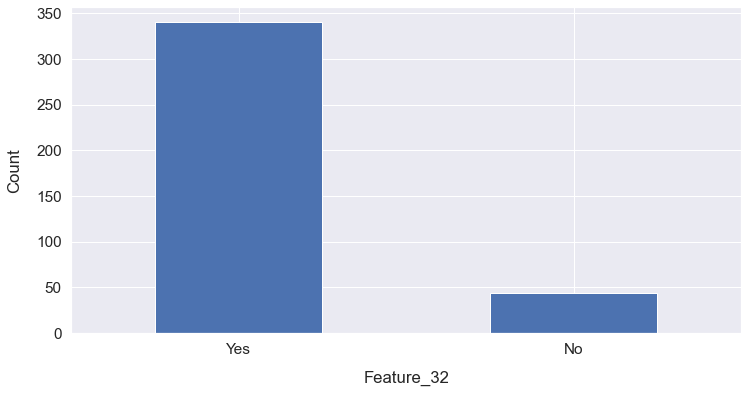

In [16]:
plot_value_counts('Feature_32')

In [17]:
data['Feature_32'].fillna(value='Yes',inplace=True)

We determined that the highest value in "Feature_32" is "Yes" by drawing a bar graph. We filled the empty values in "Feature_32" with "Yes".

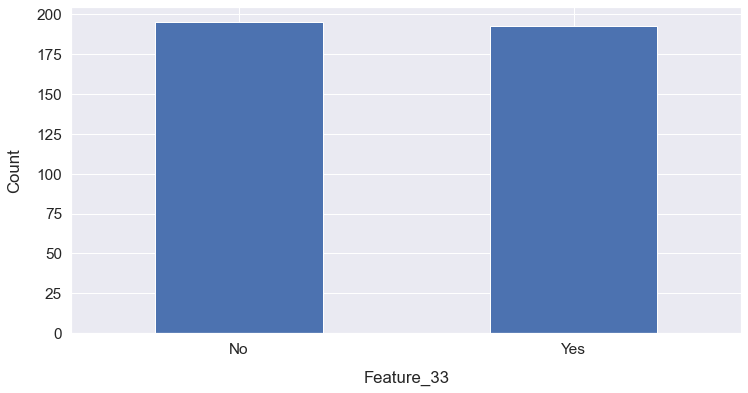

In [18]:
plot_value_counts('Feature_33')

In [19]:
data['Feature_33'].value_counts()

No     195
Yes    193
Name: Feature_33, dtype: int64

In [20]:
data['Feature_33'].fillna(value='No',inplace=True)

By drawing a bar graph, we could not determine that the most found value in "Feature_33" is "No". That's why we found it appropriate to look at value count. Then we filled the empty values in "Feature_33" with "No".

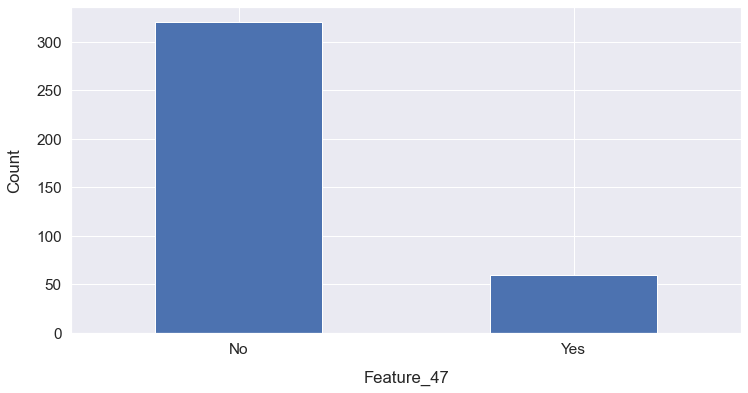

In [21]:
plot_value_counts('Feature_47')

In [22]:
data['Feature_47'].fillna(value='No',inplace=True)

We determined that the most found value in "Feature_47" is "No" by drawing a bar graph. We filled the empty values in "Feature_47" with "No".

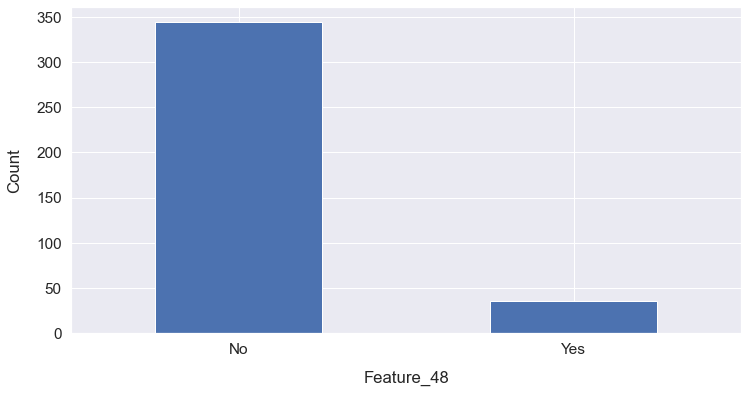

In [23]:
plot_value_counts('Feature_48')

In [24]:
data['Feature_48'].fillna(value='No',inplace=True)

We determined that the most found value in "Feature_48" is "No" by drawing a bar graph. We filled the empty values in "Feature_48" with "No".

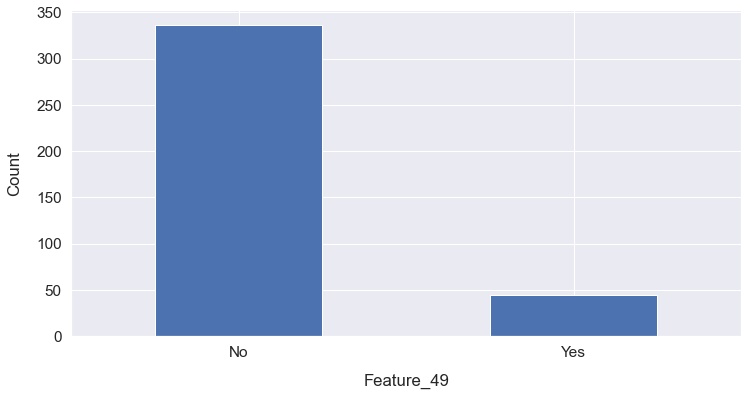

In [25]:
plot_value_counts('Feature_49')

In [26]:
data['Feature_49'].fillna(value='No',inplace=True)

We determined that the most found value in "Feature_49" is "No" by drawing a bar graph. We filled the empty values in "Feature_49" with "No".

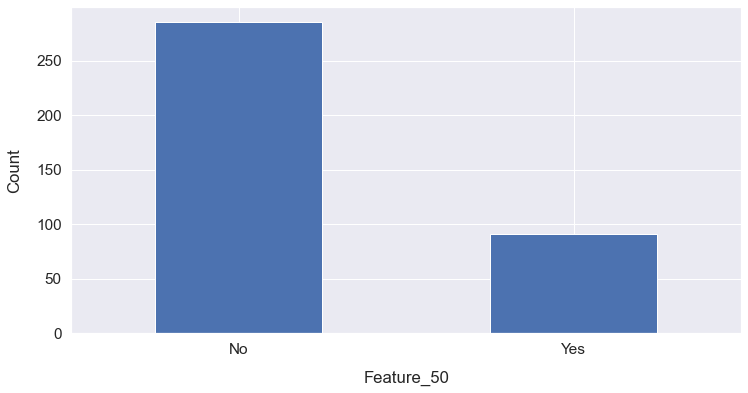

In [27]:
plot_value_counts('Feature_50')

In [28]:
data['Feature_50'].fillna(value='No',inplace=True)

We determined that the most found value in "Feature_50" is "No" by drawing a bar graph. We filled the empty values in "Feature_50" with "No".

In [29]:
data['Feature_3'] = data['Feature_3'].astype('float64')
mean = data['Feature_3'].mean()
mean

127.77060301507537

In [30]:
data['Feature_3'].fillna(value='127.7',inplace=True)

Since the values in "Feature_3" appear as objects and "Feature_3" has an empty value, we first converted the types of values to 'float64'. In order to fill the empty values, we calculated the mean of the column. Finally, we filled the empty values with mean value.

In [31]:
data['Feature_3'] = data['Feature_3'].astype('float64')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    object 
 1   Feature_1   400 non-null    object 
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    object 
 7   Feature_7   400 non-null    object 
 8   Feature_8   400 non-null    object 
 9   Feature_9   400 non-null    object 
 10  Feature_10  400 non-null    object 
 11  Feature_11  400 non-null    object 
 12  Feature_12  400 non-null    object 
 13  Feature_13  400 non-null    object 
 14  Feature_14  400 non-null    object 
 15  Feature_15  400 non-null    object 
 16  Feature_16  400 non-null    object 
 17  Feature_17  400 non-null    object 
 18  Feature_18  400 non-null    object 
 19  Feature_19  400 non-null    o

We filled the empty and nan values in the dataset with the highest frequency values for the objects, and the mean value for the numeric ones.

In [33]:
data['Feature_1'].value_counts()

Female    203
Male      197
Name: Feature_1, dtype: int64

In [34]:
data['Feature_28'].value_counts()

Every Day           206
1-2 Days a Week      69
1-2 Days a Month     65
3-4 Days a Week      60
Name: Feature_28, dtype: int64

In [35]:
data['Feature_29'].value_counts()

Evenings         197
No Difference    112
Mornings          91
Name: Feature_29, dtype: int64

We knew from our data set that the values in "Feature_1", "Feature_28" and "Feature_29" are different from "Yes" and "No". To find out what the values are, we looked at the value count for this 3 feature column.

### _Changing Categorical Values to Numeric Values_

In [36]:
def change_values(data):
    for j in range(6,49):
        data.iloc[:, j] = data.iloc[:, j].replace(['Yes', 'No'], [1, 0])
    
    
    data.iloc[:, 28] = data.iloc[:, 28].replace(['Every Day', '1-2 Days a Week', '1-2 Days a Month', 
                                                       '3-4 Days a Week'], [1, 2, 3, 4])
    data.iloc[:, 29] = data.iloc[:, 29].replace(['Evenings', 'No Difference', 'Mornings'], [1, 2, 3])
    data.iloc[:, 0] = data.iloc[:, 0].replace(['Disease_1', 'Disease_2', 'Disease_3', 'Disease_4'], [1, 2, 3, 4])
    data.iloc[:, 1] = data.iloc[:, 1].replace(['Male', 'Female'], [0, 1])
                                                                     
change_values(data)

We applied the above function to look at the correlation between features in our data set and diseases in the target column. <br>
__This function converts "Yes" to 1 and "No" to 0 for features whose values are   "Yes, No". <br>
It converts "Disease_1" to 1, "Disease_2" to 2, "Disease_3" to 3, "Disease_4"   to 4 for the diseases in "Feature_0". <br>
It converts "Male" to 0 and "Female" to 1 for "Male, Female" in "Feature_1".<br>
In "Feature_28" it converts "Every Day" to 1, "1-2 Days a Week" to 2, "1-2     Days a Month" to 3, "3-4 Days a Week" to 4. <br> 
In "Feature_29" it converts "Evenings" to 1, "No Difference" to 2, "Mornings"   to 3.__ <br>

### _Correlation_

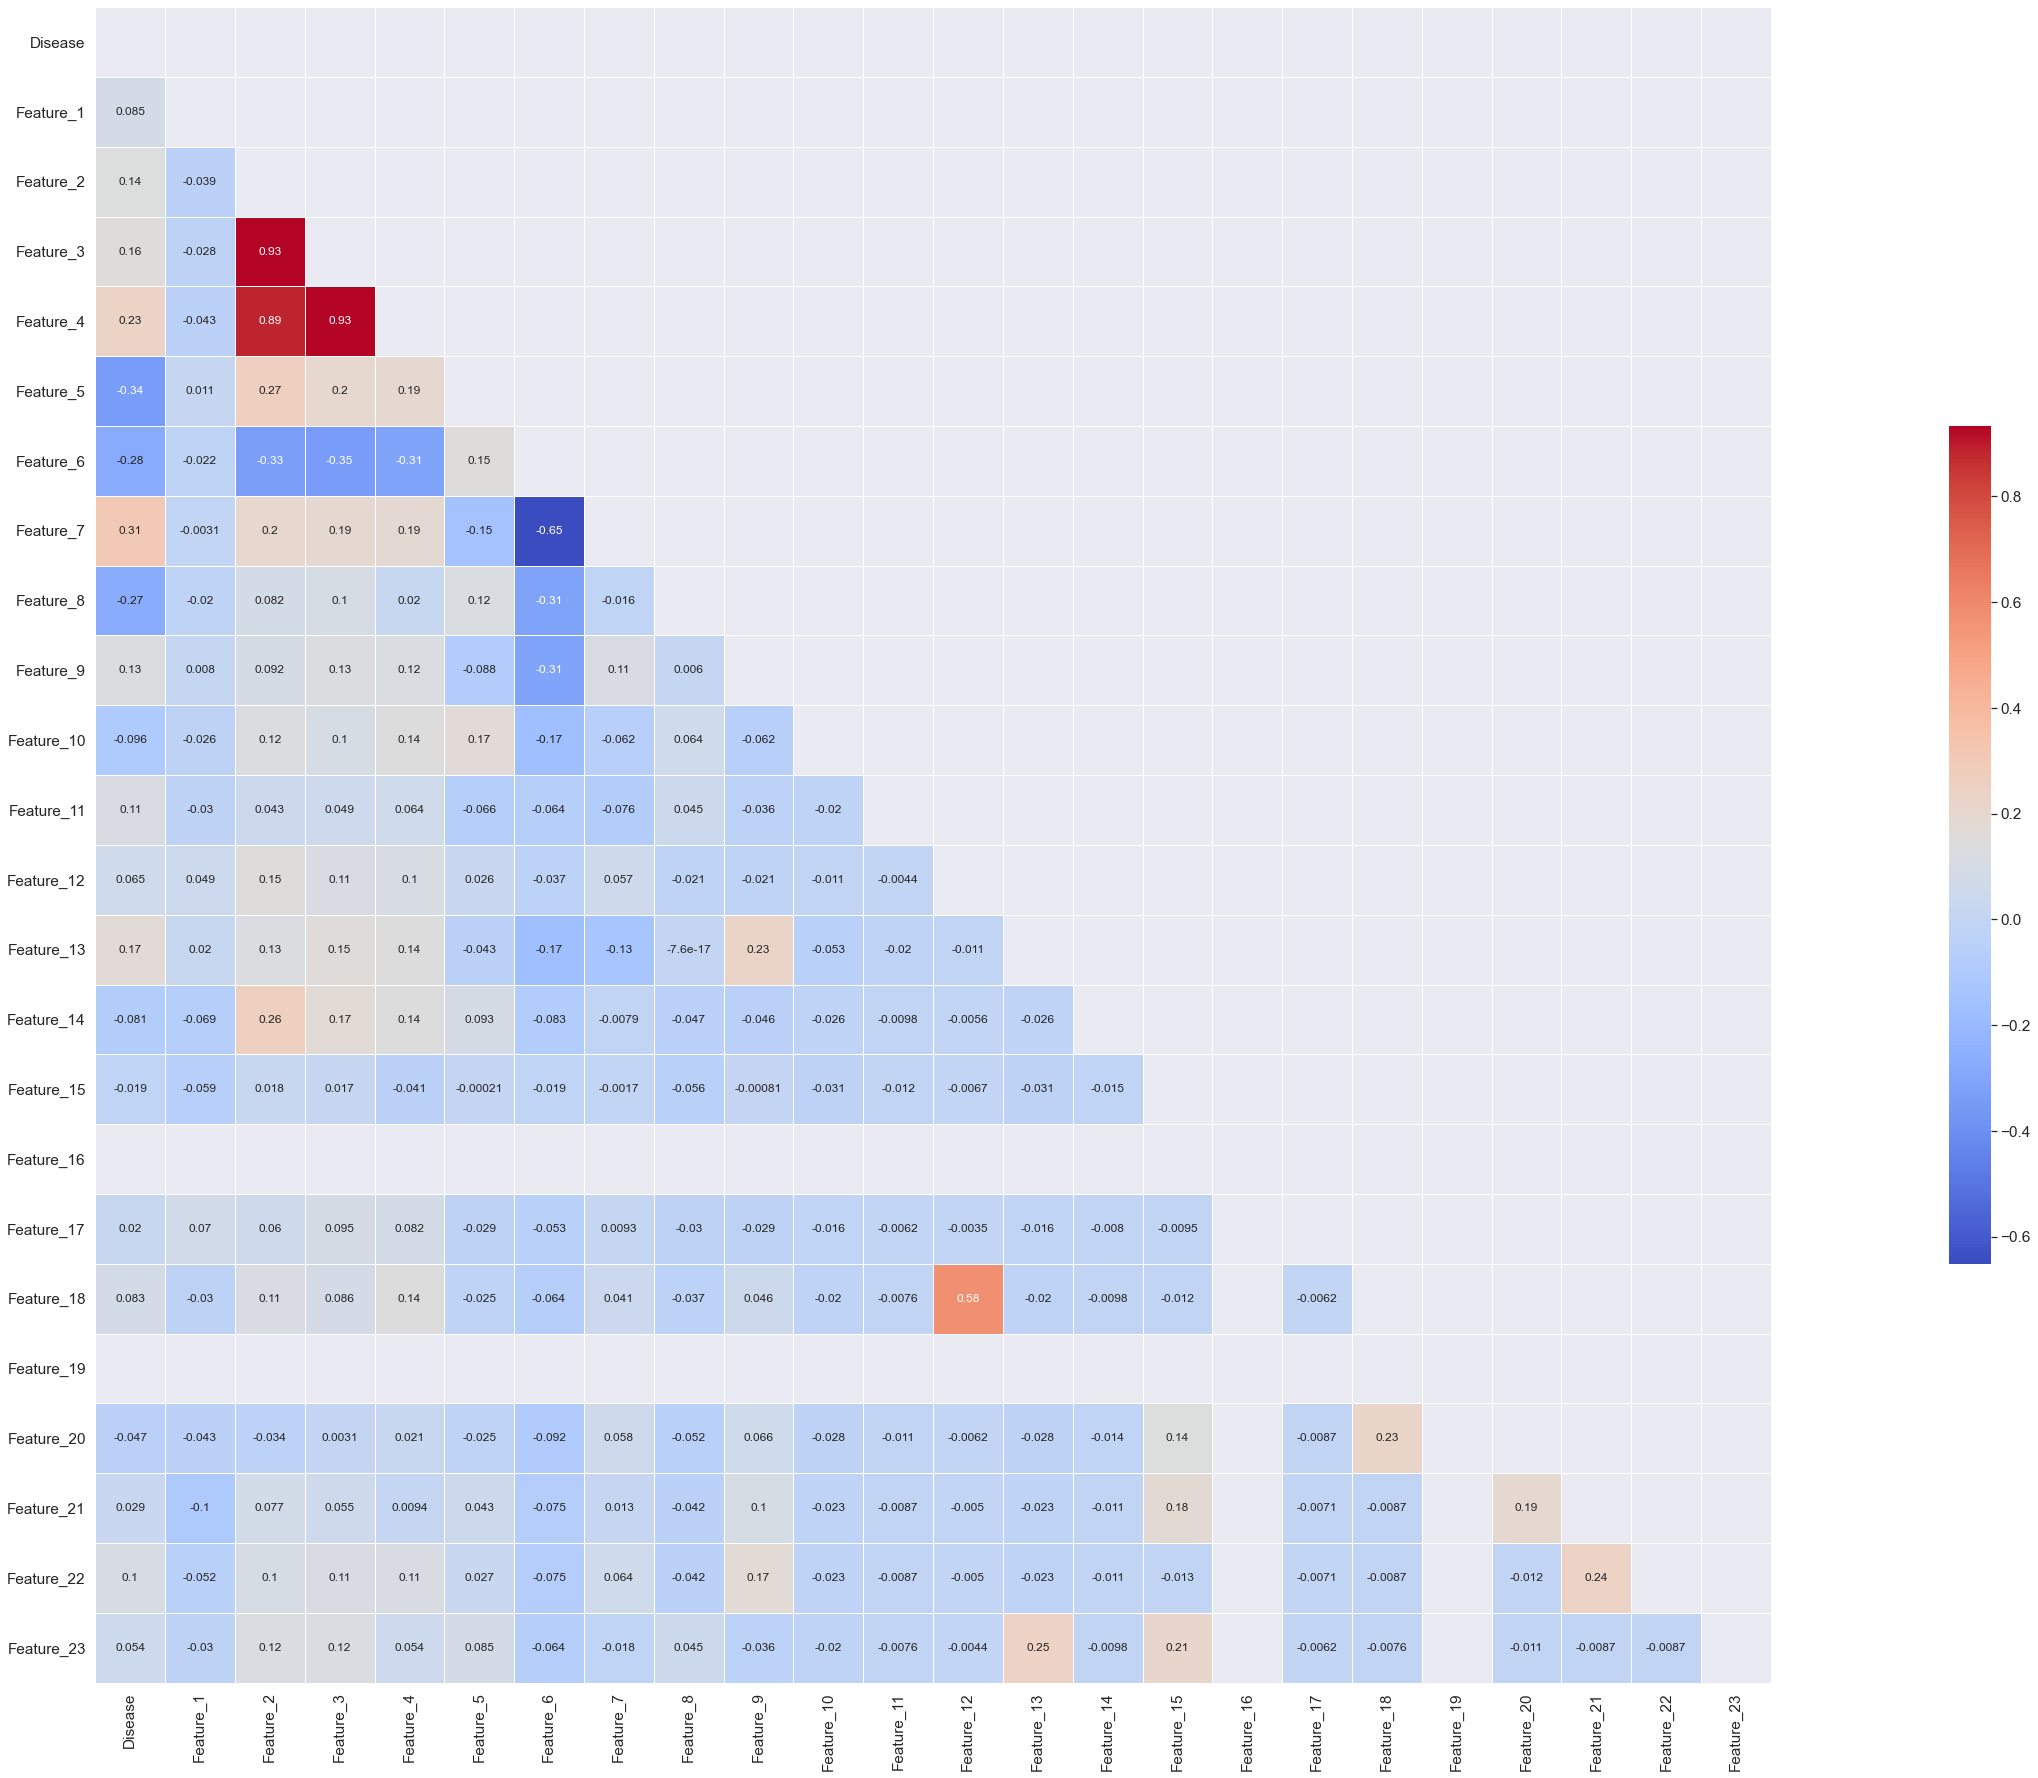

In [37]:
df_1 = data['Disease']
df_2 = data.iloc[:, 0:24]

correlation = df_2.corr()

mask = np.zeros_like(correlation, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50, 25))
sns.heatmap(correlation, mask=mask, cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": .5}, 
            annot=True, annot_kws={'size':12})

plt.tight_layout()

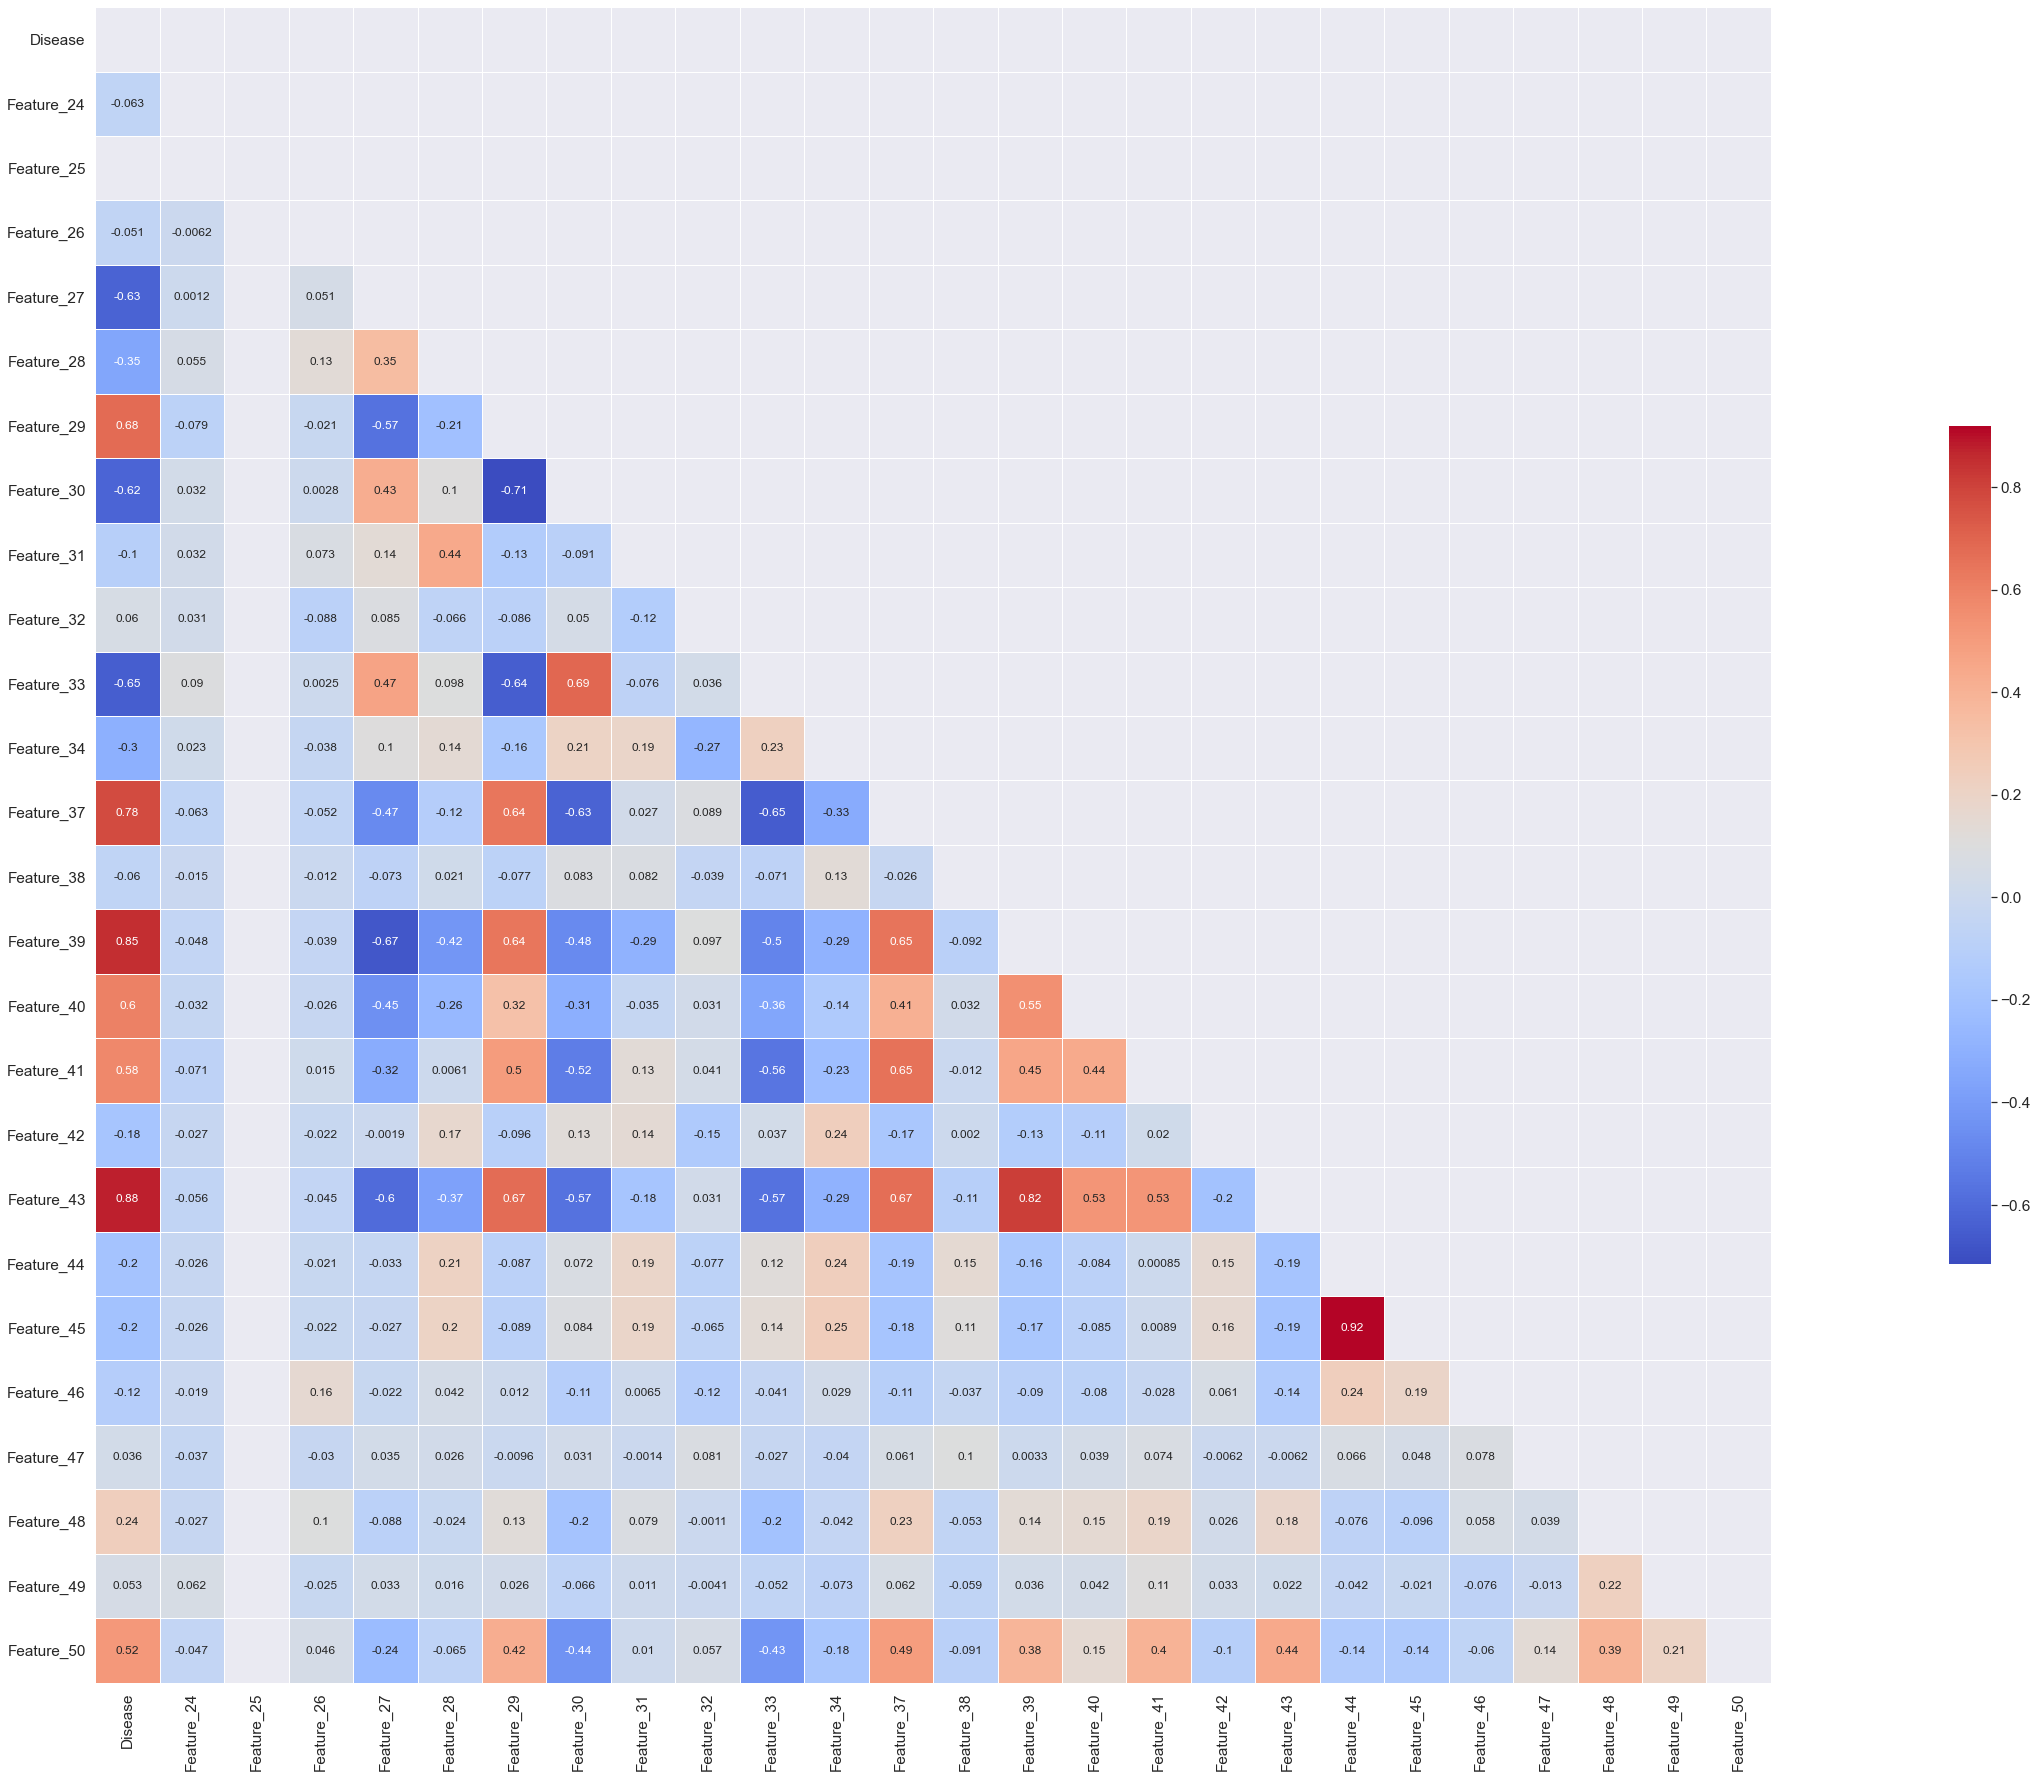

In [38]:
df_1 = data['Disease']
df_3 = data.iloc[:, 24:49]

df_3 = pd.concat([df_1, df_3], axis=1)

correlation = df_3.corr()

mask = np.zeros_like(correlation, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(50, 25))
sns.heatmap(correlation, mask=mask, cmap='coolwarm', square=True, linewidths=0.5, cbar_kws={"shrink": .5}, 
            annot=True, annot_kws={'size':12})

plt.tight_layout()

We check if there is a relationship between the independent and target variables. With data.corr () provided by Pandas, the Python library, we checked the relationship between features and diseases in two stages. The reason we did it in two stages is that there are about 50 features. We draw a heat map to examine the relationship between these values. When we looked at the relationship between disease and features, we saw that many features were unimportant. In addition, we noticed that 3 features did not appear in correlation. To check the status of these features, we looked at the value counts.

In [39]:
data['Feature_16'].value_counts()

0    400
Name: Feature_16, dtype: int64

In [40]:
data['Feature_19'].value_counts()

0    400
Name: Feature_19, dtype: int64

In [41]:
data['Feature_25'].value_counts()

0    400
Name: Feature_25, dtype: int64

When we look at the value counts of the 3 feature columns that do not appear in the correlation, we saw that all values consist of 0.

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    int64  
 1   Feature_1   400 non-null    int64  
 2   Feature_2   400 non-null    float64
 3   Feature_3   400 non-null    float64
 4   Feature_4   400 non-null    float64
 5   Feature_5   400 non-null    float64
 6   Feature_6   400 non-null    int64  
 7   Feature_7   400 non-null    int64  
 8   Feature_8   400 non-null    int64  
 9   Feature_9   400 non-null    int64  
 10  Feature_10  400 non-null    int64  
 11  Feature_11  400 non-null    int64  
 12  Feature_12  400 non-null    int64  
 13  Feature_13  400 non-null    int64  
 14  Feature_14  400 non-null    int64  
 15  Feature_15  400 non-null    int64  
 16  Feature_16  400 non-null    int64  
 17  Feature_17  400 non-null    int64  
 18  Feature_18  400 non-null    int64  
 19  Feature_19  400 non-null    i

We previously deleted "Feature_35" and "Feature_36" because they have too many missing values. So we checked this with data.info() because the index values of the columns changed. At the same time, we saw if we filled in all blank and missing values.

In [43]:
data.drop(['Feature_1', 'Feature_5', 'Feature_6', 'Feature_8', 'Feature_10', 
                       'Feature_12', 'Feature_38', 'Feature_42', 'Feature_49'], axis=1, inplace=True)
data.drop(data.iloc[:, 8:23], axis=1, inplace=True)
data.drop(data.iloc[:, 9:14], axis=1, inplace=True)
data.drop(data.iloc[:, 14:18], axis=1, inplace=True)

According to the correlation measurements we see in the heat map, we deleted the features that we deemed necessary from our data set.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Disease     400 non-null    int64  
 1   Feature_2   400 non-null    float64
 2   Feature_3   400 non-null    float64
 3   Feature_4   400 non-null    float64
 4   Feature_7   400 non-null    int64  
 5   Feature_9   400 non-null    int64  
 6   Feature_11  400 non-null    int64  
 7   Feature_13  400 non-null    int64  
 8   Feature_29  400 non-null    int64  
 9   Feature_37  400 non-null    int64  
 10  Feature_39  400 non-null    int64  
 11  Feature_40  400 non-null    int64  
 12  Feature_41  400 non-null    int64  
 13  Feature_43  400 non-null    int64  
 14  Feature_48  400 non-null    int64  
 15  Feature_50  400 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 50.1 KB


We checked the data to get information about the features remaining in our data set and the final state of the data set.

### _Checking Outliers_

In [45]:
data.describe(include="all")

,Disease,Feature_2,Feature_3,Feature_4,Feature_7,Feature_9,Feature_11,Feature_13,Feature_29,Feature_37,Feature_39,Feature_40,Feature_41,Feature_43,Feature_48,Feature_50
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.00000,400.00000,400.000000
mean,1.715000,29.410125,127.770250,108.104000,0.435000,0.145000,0.007500,0.050000,1.735000,0.347500,0.23000,0.120000,0.397500,0.29000,0.09000,0.227500
std,0.993096,14.350309,22.472799,49.526425,0.496378,0.352542,0.086385,0.218218,0.807096,0.476773,0.42136,0.325369,0.489994,0.45433,0.28654,0.419743
min,1.000000,10.000000,76.000000,12.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000
25%,1.000000,18.000000,110.000000,64.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000
50%,1.000000,25.525000,127.850000,108.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000
75%,3.000000,38.000000,147.000000,144.000000,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.00000,0.000000,1.000000,1.00000,0.00000,0.000000
max,4.000000,90.000000,181.000000,213.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.00000,1.000000


Three of the final features of our data had float values. We first looked at data.describe() to check if there is an outlier value in "Feature_2", "Feature_3" and "Feature_4".

<AxesSubplot:xlabel='Feature_2'>

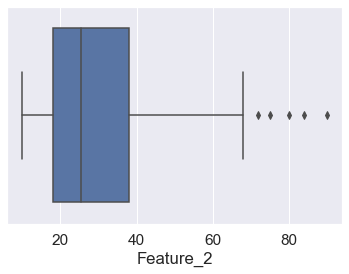

In [46]:
sns.boxplot(x=data['Feature_2'])

<AxesSubplot:xlabel='Feature_3'>

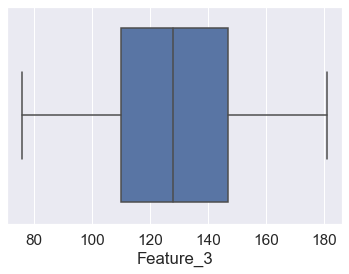

In [47]:
sns.boxplot(x=data['Feature_3'])

<AxesSubplot:xlabel='Feature_4'>

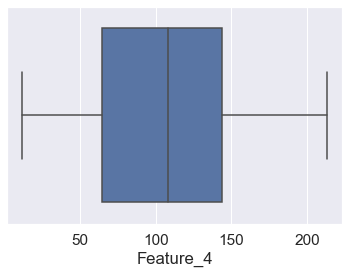

In [48]:
sns.boxplot(x=data['Feature_4'])

We have determined that there is no outlier value in "Feature_3" and "Feature_4", but there are 5 outlier values after the maximum value in "Feature_2".

In [49]:
mean = data['Feature_2'].mean()
median = data['Feature_2'].median()
std = data['Feature_2'].std()
max = mean + (2.8 * std)
min =  mean - (3 * std)
data.loc[data.Feature_2 > max, 'Feature_2'] = np.nan
data.fillna(median, inplace=True)

<AxesSubplot:xlabel='Feature_2'>

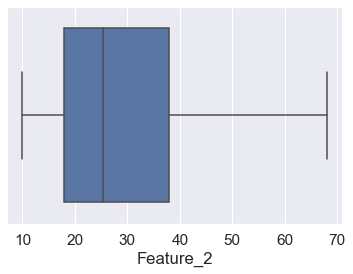

In [50]:
sns.boxplot(x=data['Feature_2'])

After calculating mean, median and standard deviation for "Feature_2", we determined max and min limits. We converted the values outside these limits to NaN and then replaced the NaN value with median.

### _Feature Importance_

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier() 
model.fit( data[ ["Feature_2","Feature_3","Feature_4","Feature_7","Feature_9","Feature_11","Feature_13",
                "Feature_29","Feature_37","Feature_39","Feature_40","Feature_41","Feature_43","Feature_48",
                "Feature_50"] ] , data['Disease'])

ExtraTreesClassifier()

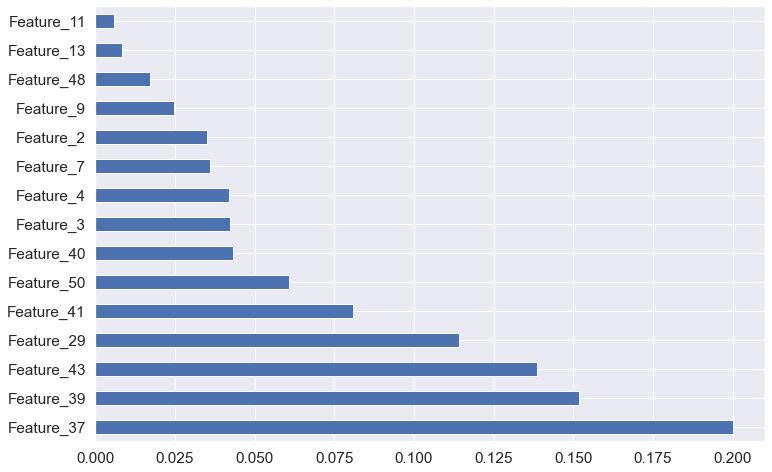

['Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_7',
 'Feature_9',
 'Feature_11',
 'Feature_13',
 'Feature_40',
 'Feature_48']

In [52]:
feature_importances = pd.Series(model.feature_importances_, index= data[ ["Feature_2","Feature_3","Feature_4","Feature_7","Feature_9","Feature_11","Feature_13",
                "Feature_29","Feature_37","Feature_39","Feature_40","Feature_41","Feature_43","Feature_48",
                "Feature_50"] ].columns)
plt.figure(figsize=(12,8))
feature_importances.nlargest(16).plot(kind='barh')
plt.show()

array = dict(feature_importances)
dropped_columns = []

for k,v in array.items():
    if v < 0.05:
        dropped_columns.append(k)

dropped_columns

Since this model we created will be used for doctors to detect a disease, we planned to make the most accurate predictions with the least feature. That's why we thought how much we could reduce our feature number. The way to do this was to check which of the remaining features were more important to the model. We tried to test the importance of features with ExtraTreesClassifier from the scikit-learn library.

In [53]:
data.drop(dropped_columns, axis=1, inplace=True)

Each time we tested the feature importance model, we deleted the features whose feature importance was in the same order and had the lowest importance.

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Disease     400 non-null    int64
 1   Feature_29  400 non-null    int64
 2   Feature_37  400 non-null    int64
 3   Feature_39  400 non-null    int64
 4   Feature_41  400 non-null    int64
 5   Feature_43  400 non-null    int64
 6   Feature_50  400 non-null    int64
dtypes: int64(7)
memory usage: 22.0 KB


To create the model, we cleared our data set from lost data, filled in the features with less missing data, and deleted the features we deemed unnecessary based on the correlation and feature importance algorithm. Since numerical values are required for the model to work, we converted all categorical values to numeric values. In the final version of our data set, 11 features remained so that we could predict the disease. Now we'll try the classifiers to build the model we can use.

## 4. Modeling and Evaluation <a class="anchor" id="modeling"></a>

In the sections above, we analyzed and cleaned our data set to create a model. In the modeling section, we will create models using multiple classification techniques.

### Train-Test Split

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [56]:
X = data.iloc[:,1:]
y = data["Disease"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Normalizing Train-Test Data

In [58]:
scaler = MinMaxScaler()
X_train_ND = scaler.fit_transform(X_train)
X_test_ND = scaler.fit_transform(X_test)

MinMax Scaling is a state in which data takes values between 0 and 1. Here the distribution is similar to the distribution of the data. There is a sensitivity situation against the external data called "outlier" here, so it may not perform well in a situation where these values are too high. <br>
We also used the "MinMaxScaler" method to normalize the features in our dataset.

### Model Evaluator

In the continuation of our project, we created a dictionary that keeps the names of the models and their accuracy scores for all models that we will create and test.

In [59]:
models = {}  # Key-Model Name, Value-Model's Accuracy Score

Here is the function we have written so that all created models can be displayed in a single bar graph.

In [60]:
def showFigure(fig, x, y):
    fig = plt.gcf()
    fig.set_size_inches(x, y)
    plt.show()

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from mlxtend.plotting import plot_confusion_matrix

def evaluator(y_test, y_pred):    
    
    print('Accuracy is: {:.3f}'.format( accuracy_score(y_test,y_pred) ))
    print()
    
    print('Classification Report: \n',classification_report(y_test,y_pred, 
                    target_names=['Disease_1', 'Disease_2', 'Disease_3', 'Disease_4']))
    print()
    
    lb = LabelBinarizer()
    y_test1 = lb.fit_transform(y_test)
    y_pred1 =lb.transform(y_pred)
    print('AUC_ROC Score: ',roc_auc_score(y_test1,y_pred1,average='macro'),'\n\n')
    
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,11))

    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(
        data=cm,
        annot=True,
        fmt='.2f',
        linewidths=.5,
        xticklabels=["Disease_1", "Disease_2","Disease_3","Disease_4"],
        yticklabels=["Disease_1", "Disease_2","Disease_3","Disease_4"],
        ax=ax1
    )
    ax1.set_title("Confusion Matrix")
    
    cm_n = confusion_matrix(y_test, y_pred, normalize="true")
    sns.heatmap(
        data=cm_n,
        annot=True,
        fmt='.2f',
        linewidths=.5,
        cmap='OrRd',
        xticklabels=["Disease_1", "Disease_2","Disease_3","Disease_4"],
        yticklabels=["Disease_1", "Disease_2","Disease_3","Disease_4"],
        ax=ax2
    )
    ax2.set_title("Normalized Confusion Matrix")
    
    
    TP1 = cm[0, 0].sum()      # True Positive
    TN1 = cm[1:4, 1:4].sum()  # True Negative
    FP1 = cm[1:4, 0].sum()    # False Positive
    FN1 = cm[0, 1:4].sum()    # False Negative

    TP2 = cm[1, 1].sum()   
    TN2 = cm.sum()-cm[1,:].sum()-cm[:,1].sum()+cm[1,1].sum()
    FP2 = cm[:,1].sum()-cm[1,1].sum()
    FN2 = cm[1,:].sum()-cm[1,1].sum()

    TP3 = cm[2, 2].sum()   
    TN3 = cm.sum()-cm[2,:].sum()-cm[:,2].sum()+cm[2,2].sum()
    FP3 = cm[:,2].sum()-cm[2,2].sum()
    FN3 = cm[2,:].sum()-cm[2,2].sum()

    TP4 = cm[3, 3].sum()   
    TN4 = cm[0:3, 0:3].sum()   
    FP4 = cm[0:3, 3].sum()
    FN4 = cm[3, 0:3].sum()   

    print("Disease_1 accuracy score = {:.2f}".format( (TP1+TN1)/(TP1+TN1+FP1+FN1) ) )
    print("Disease_2 accuracy score = {:.2f}".format( (TP2+TN2)/(TP2+TN2+FP2+FN2) ) )
    print("Disease_3 accuracy score = {:.2f}".format( (TP3+TN3)/(TP3+TN3+FP3+FN3) ) )
    print("Disease_4 accuracy score = {:.2f}".format( (TP4+TN4)/(TP4+TN4+FP4+FN4) ) )
    print("\n")

It is an evaluator that shows results such as accuracy score, classification report, auc_roc_score, confusion matrices and accuracy scores of diseases in all models created. In this evaluator, we manually performed the accuracy score finding for each disease.

### Random Forest Classifier

Random Forest is a flexible, easy-to-use machine learning algorithm that often produces a great result, even without hyperparameter tuning. It is also one of the most used algorithms because it can be used for both simplicity and classification and regression tasks. <br>
To test our model, we first used RandomForestClassifier class from scikit-learn library. We tried to get good results using data normalized with MinMaxScaler.

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier()
y_pred_rfc = rfc.fit(X_train_ND, y_train).predict(X_test_ND)

Accuracy is: 0.942

Classification Report: 
               precision    recall  f1-score   support

   Disease_1       0.98      1.00      0.99        82
   Disease_2       0.90      0.82      0.86        11
   Disease_3       0.85      0.81      0.83        21
   Disease_4       0.83      0.83      0.83         6

    accuracy                           0.94       120
   macro avg       0.89      0.87      0.88       120
weighted avg       0.94      0.94      0.94       120


AUC_ROC Score:  0.9200197637546745 


Disease_1 accuracy score = 0.98
Disease_2 accuracy score = 0.97
Disease_3 accuracy score = 0.94
Disease_4 accuracy score = 0.98




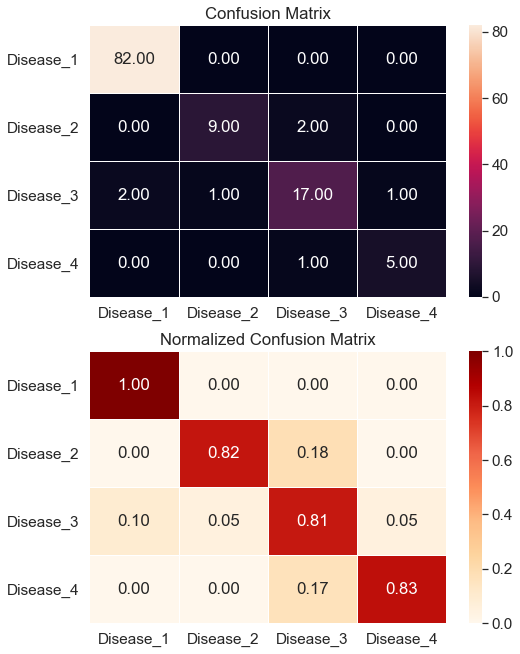

In [64]:
models['RandomForestClassifier'] = accuracy_score(y_test,y_pred_rfc) * 100
evaluator(y_test, y_pred_rfc)

Above are the results of the RandomForestClassifier classification algorithm on our model. In order to evaluate the Random Forest algorithm, we fit the model on our normalized train data and then make our estimation on our normalized test data. We sent our estimation and y_test parameters to the "evaluator" function that we had previously designed, and obtained information about the accuracy score, the classification report, confusion matrices, and the accuracy scores of the diseases of the Random Forest algorithm.

__When we trained our model with the Random Forest Classifier, we achieved an accuracy score of 94.2%. When we look at the confusion matrices, we can see that there are 2 wrong predictions for Disease_2, 4 wrong predictions for Disease_3, 1 wrong prediction for Disease_4. Our models also needed to show the accuracy scores of the 3 most likely diseases the doctor could diagnose. With Random Forest, we reached 98% accuracy in Disease_1, 98% accuracy in Disease_4 and 97% accuracy in Disease_2 and 94% accuracy in Disease_3.__

### Logistic Regression

Logistic Regression is a regression method for classification. It is used to classify categorical or numerical data. It works only if the dependent variable, ie the result, can take 2 different values. (Yes / No, Male / Female, Fat / Thin etc.) <br>
The purpose of logistic regression is to find the most appropriate (yet biologically plausible) model to describe the relationship between a two-way characteristic (dependent variable = response or outcome variable) and a set of independent (predictive or explanatory) variables.

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()
y_pred_lr = lr.fit(X_train_ND, y_train).predict(X_test_ND)

Accuracy is: 0.925

Classification Report: 
               precision    recall  f1-score   support

   Disease_1       1.00      1.00      1.00        82
   Disease_2       1.00      0.82      0.90        11
   Disease_3       0.71      0.95      0.82        21
   Disease_4       0.00      0.00      0.00         6

    accuracy                           0.93       120
   macro avg       0.68      0.69      0.68       120
weighted avg       0.90      0.93      0.91       120


AUC_ROC Score:  0.835122844991266 


Disease_1 accuracy score = 1.00
Disease_2 accuracy score = 0.98
Disease_3 accuracy score = 0.93
Disease_4 accuracy score = 0.94




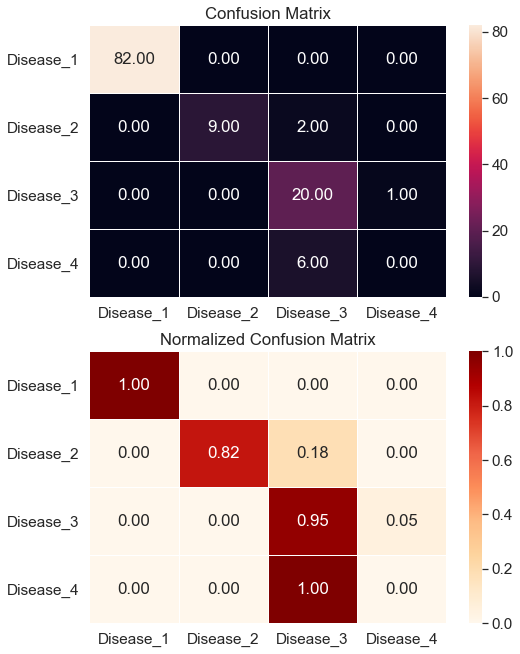

In [67]:
models['LogisticRegression'] = accuracy_score(y_test,y_pred_lr) * 100
evaluator(y_test, y_pred_lr)

The results of the Logistic Regression classification algorithm in our model are above. To evaluate the Logistic Regression algorithm, we fit the model to our normalized train data and then make our prediction on our normalized test data. We sent our estimation and y_test parameters to the "evaluator" function we designed earlier and we got information about the accuracy score of the diseases, the classification report, confusion matrices and accuracy scores of the Logistic Regression algorithm.

__When we trained our model with the Logistic Regression, we achieved an accuracy score of 92.5%. When we look at the confusion matrices, we can see that there are 2 wrong predictions for Disease_2, 1 wrong prediction for Disease_3, 6 wrong predictions for Disease_4. Our models also needed to show the accuracy scores of the 3 most likely diseases the doctor could diagnose. With Logistic Regression, we reached 100% accuracy in Disease_1, 98% accuracy in Disease_2, 93% accuracy in Disease_3 and 94% accuracy in Disease_4.__

### K-Nearest Neighbors

The K-NN (K-Nearest Neighbor) algorithm is one of the simplest and most used classification algorithm. K-NN is a non-parametric, lazy learning algorithm. If we try to understand the concept of lazy, unlike eager learning, lazy learning does not have a training stage. It does not learn the training data but instead “memorizes” the training data set. When we want to make a guess, it looks for the closest neighbors in the entire data set. <br>
In the operation of the algorithm, a K value is determined. The meaning of this K value is the number of elements to look at. When a value comes, the distance between the value is calculated by taking the nearest K number of elements.

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=4)
y_pred_knn = knn.fit(X_train_ND, y_train).predict(X_test_ND)

Accuracy is: 0.925

Classification Report: 
               precision    recall  f1-score   support

   Disease_1       0.95      1.00      0.98        82
   Disease_2       1.00      0.82      0.90        11
   Disease_3       0.77      0.81      0.79        21
   Disease_4       1.00      0.50      0.67         6

    accuracy                           0.93       120
   macro avg       0.93      0.78      0.83       120
weighted avg       0.93      0.93      0.92       120


AUC_ROC Score:  0.87149217741323 


Disease_1 accuracy score = 0.97
Disease_2 accuracy score = 0.98
Disease_3 accuracy score = 0.93
Disease_4 accuracy score = 0.97




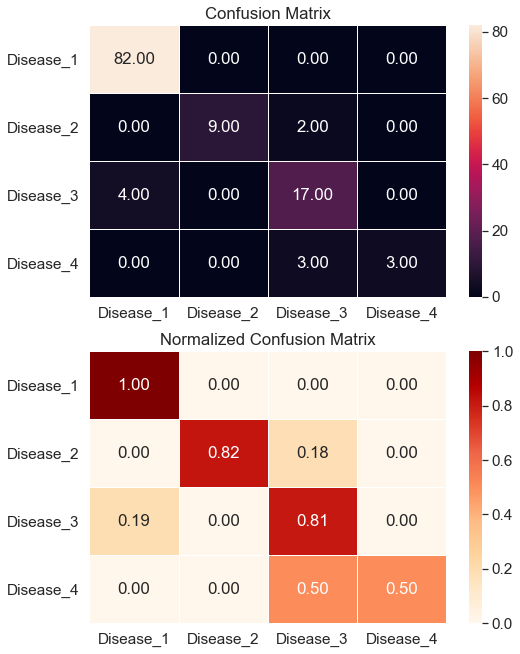

In [70]:
models['KNearestNeighbors'] = accuracy_score(y_test,y_pred_knn) * 100
evaluator(y_test, y_pred_knn)

The results of the K-Nearest Neighbors classification algorithm in our model are above. To evaluate the K-Nearest Neighbors algorithm, we fit the model to our normalized train data and then make our prediction on our normalized test data. We sent our prediction and y_test parameters to the "evaluator" function we designed earlier, and we got information about the accuracy score of the diseases, the classification report, the confusion matrices and the accuracy scores of the K-Nearest Neighbors algorithm.

__When we trained our model with the K-Nearest Neighbors, we achieved an accuracy score of 92.5%. When we look at the confusion matrices, we can see that there are 2 wrong predictions for Disease_2, 4 wrong prediction for Disease_3, 3 wrong predictions for Disease_4. Our models also needed to show the accuracy scores of the 3 most likely diseases the doctor could diagnose. With K-Nearest Neighbors, we reached 97% accuracy in Disease_1, 98% accuracy in Disease_2, 93% accuracy in Disease_3 and 97% accuracy in Disease_4.__

### Decision Tree Classifier

Decision tree algorithm is one of the data mining classification algorithms.
They have a predefined target variable. By their nature, they offer a strategy from top to bottom.
A decision tree is a structure used to divide a data set containing a large number of records into smaller sets by applying a set of decision rules. In other words, it is a structure that is used by applying simple decision-making steps and dividing large amounts of records into very small groups of records.

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtc = DecisionTreeClassifier()
y_pred_dtc = dtc.fit(X_train_ND, y_train).predict(X_test_ND)

Accuracy is: 0.933

Classification Report: 
               precision    recall  f1-score   support

   Disease_1       0.98      1.00      0.99        82
   Disease_2       1.00      0.82      0.90        11
   Disease_3       0.78      0.86      0.82        21
   Disease_4       0.75      0.50      0.60         6

    accuracy                           0.93       120
   macro avg       0.88      0.79      0.83       120
weighted avg       0.93      0.93      0.93       120


AUC_ROC Score:  0.8829270145059619 


Disease_1 accuracy score = 0.98
Disease_2 accuracy score = 0.98
Disease_3 accuracy score = 0.93
Disease_4 accuracy score = 0.97




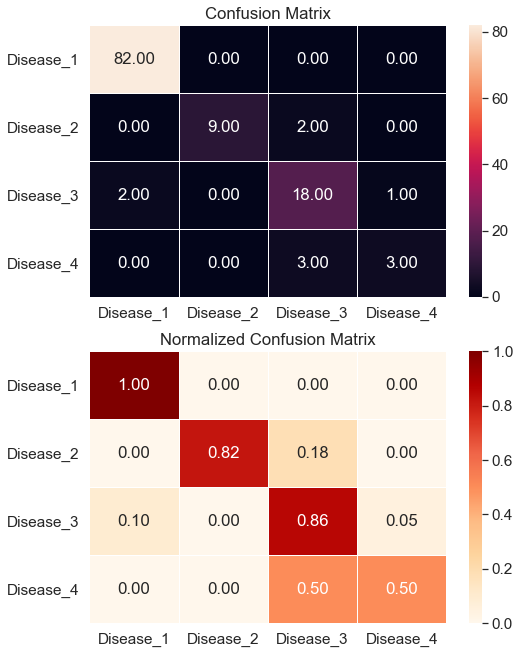

In [73]:
models['DecisionTreeClassifier'] = accuracy_score(y_test,y_pred_dtc) * 100
evaluator(y_test, y_pred_dtc)

The results of the Decision Tree Classifier classification algorithm in our model are above. To evaluate the Decision Tree Classifier algorithm, we fit the model to our normalized train data and then make our prediction on our normalized test data. We sent our prediction and y_test parameters to the "evaluator" function we designed earlier, and we got information about the accuracy score of the diseases, the classification report, confusion matrices and accuracy scores of the Decision Tree Classifier algorithm.

__When we trained our model with the Decision Tree Classifier, we achieved an accuracy score of 93.3%. When we look at the confusion matrices, we can see that there are 2 wrong predictions for Disease_2, 3 wrong prediction for Disease_3, 3 wrong predictions for Disease_4. Our models also needed to show the accuracy scores of the 3 most likely diseases the doctor could diagnose. With Decision Tree Classifier, we reached 98% accuracy in Disease_1, 98% accuracy in Disease_2, 93% accuracy in Disease_3 and 97% accuracy in Disease_4.__

### Support Vector Machines

Support Vector Machines is one of the supervised learning methods used in classification problems. Draws a line to separate points placed on a plane. This line aims to be at the maximum distance for the points of both classes. It is suitable for complex but small to medium sized datasets.

In [74]:
from sklearn.svm import SVC

In [75]:
svm = SVC(kernel='linear')
y_pred_svm = svm.fit(X_train_ND, y_train).predict(X_test_ND)

Accuracy is: 0.917

Classification Report: 
               precision    recall  f1-score   support

   Disease_1       0.96      1.00      0.98        82
   Disease_2       0.85      1.00      0.92        11
   Disease_3       0.77      0.81      0.79        21
   Disease_4       0.00      0.00      0.00         6

    accuracy                           0.92       120
   macro avg       0.65      0.70      0.67       120
weighted avg       0.87      0.92      0.89       120


AUC_ROC Score:  0.832715345843062 


Disease_1 accuracy score = 0.97
Disease_2 accuracy score = 0.98
Disease_3 accuracy score = 0.93
Disease_4 accuracy score = 0.95




c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\can_a\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

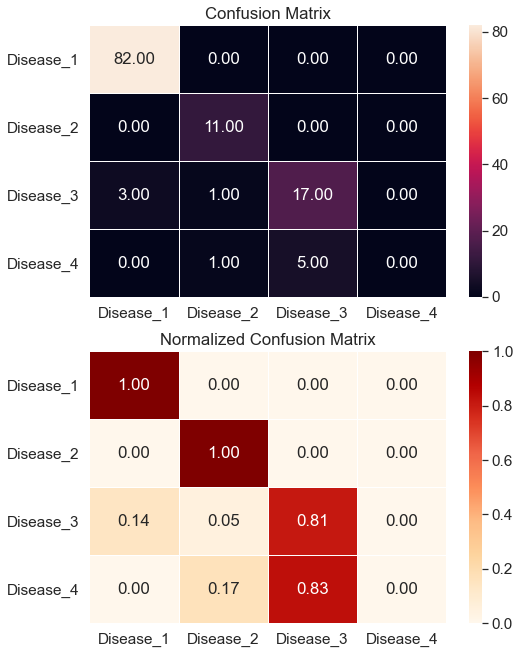

In [76]:
models['LinearSVM'] = accuracy_score(y_test,y_pred_svm) * 100
evaluator(y_test, y_pred_svm)

The results of the Support Vector Machines classification algorithm in our model are above. To evaluate the Support Vector Machines algorithm, we fit the model to our normalized train data and then make a prediction on our normalized test data. We sent our prediction and y_test parameters to the "evaluator" function we designed earlier, and we learned about the accuracy score of diseases, the classification report, the confusion matrices and the accuracy scores of the Support Vector Machines algorithm.

__When we trained our model with the Support Vector Machines, we achieved an accuracy score of 91.7%. When we look at the confusion matrices, we can see that there are 4 wrong prediction for Disease_3, 6 wrong predictions for Disease_4. Our models also needed to show the accuracy scores of the 3 most likely diseases the doctor could diagnose. With Support Vector Machines, we reached 97% accuracy in Disease_1, 98% accuracy in Disease_2, 93% accuracy in Disease_3 and 95% accuracy in Disease_4.__

### Naive Bayes Classifier

The Naive Bayes Classifier is based on Bayes' theorem. It is a lazy learning algorithm, it can also work on unstable datasets. The way the algorithm works calculates the probability of each state for an element and classifies it according to the one with the highest probability value. With a little training data, he can do very successful jobs. Examples of usage areas are real-time prediction, multi-class prediction, text classification, spam filtering, sentiment analysis and suggestion systems.

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
nbc = GaussianNB()
y_pred_nbc = nbc.fit(X_train_ND, y_train).predict(X_test_ND)

Accuracy is: 0.833

Classification Report: 
               precision    recall  f1-score   support

   Disease_1       1.00      0.99      0.99        82
   Disease_2       0.73      1.00      0.85        11
   Disease_3       1.00      0.14      0.25        21
   Disease_4       0.24      0.83      0.37         6

    accuracy                           0.83       120
   macro avg       0.74      0.74      0.62       120
weighted avg       0.94      0.83      0.82       120


AUC_ROC Score:  0.8483684036674815 


Disease_1 accuracy score = 0.99
Disease_2 accuracy score = 0.97
Disease_3 accuracy score = 0.85
Disease_4 accuracy score = 0.86




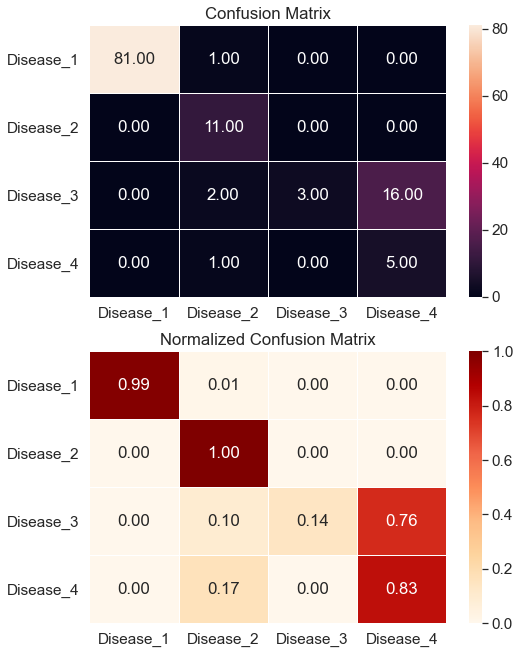

In [79]:
models['NaiveBayes'] = accuracy_score(y_test,y_pred_nbc) * 100
evaluator(y_test, y_pred_nbc)

The results of the Naive Bayes Classifier classification algorithm in our model are above. To evaluate the Naive Bayes Classifier algorithm, we fit the model to our normalized train data and then make our prediction on our normalized test data. We sent our prediction and y_test parameters to the "evaluator" function we designed earlier, and we got information about the accuracy score of the diseases, classification report, confusion matrices and accuracy scores of the Naive Bayes Classifier algorithm.

__When we trained our model with the Gaussian Naive Bayes, we achieved an accuracy score of 83.3%. When we look at the confusion matrices, we can see that there are 18 wrong prediction for Disease_3, 1 wrong predictions for Disease_4. Our models also needed to show the accuracy scores of the 3 most likely diseases the doctor could diagnose. With Gaussian Naive Bayes, we reached 99% accuracy in Disease_1, 97% accuracy in Disease_2, 85% accuracy in Disease_3 and 86% accuracy in Disease_4.__

## 5. Conclusion <a class="anchor" id="conclusion"></a>

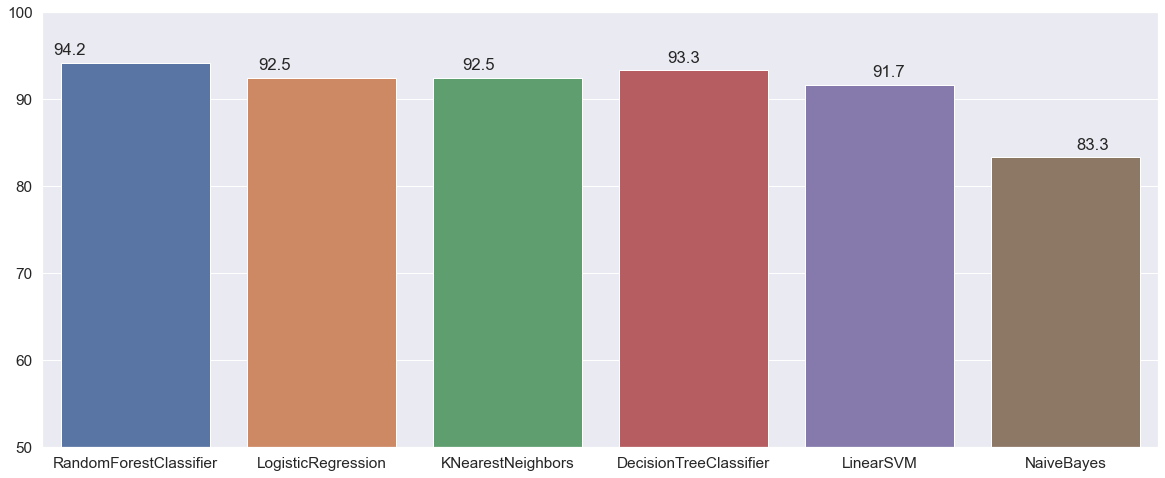

In [80]:
accuracy_scores = pd.Series(models)
fig = sns.barplot(x=accuracy_scores.index, y=accuracy_scores.values)
plt.ylim([50.0,100.0])
for p in fig.patches:
        fig.annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.1, p.get_height() * 1.01))
showFigure(fig, x=20, y=8)

In this study, we compared disease data using the most appropriate data science techniques for classification.

We analyzed our data before applying data science techniques. As a result of our analysis, we realized that our data is not very clean. By making data preparation, we made the data set suitable for our model.

We used 6 different classification models to create our model to predict diseases.

__1- Random Forest Classifier__

__2- Logistic Regression__

__3- K-Nearest Neighbors__

__4- Decision Tree Classifier__

__5- Support Vector Machine__

__6- Gaussian Naive Bayes__

Among our models, the best predictive model was the Random Forest classifier. That's why we use the Random Forest classifier in the web application.

## 6. References <a class="anchor" id="references"></a>

[1] Datacamp : https://learn.datacamp.com/ <br>
[2] Lecture Notes : http://yunus.hacettepe.edu.tr/~akal/BBM467/         <br>
[3] https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e         <br>
[4] https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e         <br>
[5] https://www.kaggle.com/avibagul80/fetal-health-classification-98-6?scriptVersionId=61213303         <br>
[6] https://towardsdatascience.com/exploratory-data-analysis-in-python-c9a77dfa39ce         <br>
[7] https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python         <br>


**Disclaimer!** <font color='grey'>This notebook was prepared by Sadık Can Acar & Mustafa Kollu as a term project for the *BBM467 - Data Intensive Applications Laboratory* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>